

# <center> Case Study 3： Visualisation in machine learning


## <center>Group Members:

### <center>Yifan Xie 2509996X

### <center>Omar Jabri 2519359J

### <center>Tomas Simutis 2603015S

## <center>Part 1: Introduction
The purpose of the case study 3 visualization is to get familiar with building the ML systems by visualizing the data.
We will chart out characteristic signals (e.g., patterns, separability, relationships between features and targets, relationships between different features, etc.) and fluctuations (e.g., noise levels, data distribution, etc.).

### Goal
The goal entails optimising feature pre-processing for a simple classification problem, with the aid of visualisation (unsupervised learning) to aid in feature vector selection. The aim is to gain *insight* into the data and construct effective machine learning models by using visualisation.


### Classifier
In this case study, we'll just use the most basic classifier — **k nearest neighbours** — and concentrate on how to process the features to make this simple algorithm work as efficiently as possible. Many current approaches will learn an end-to-end classifier that infers sufficient feature extraction directly using deep learning.
    
The task is to modify the parameters that affect the creation of the feature vectors and explore different visualisations to help identify a good feature transform.


In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import audio_task
%matplotlib inline

### Set the parameters

In [2]:
######### PARAMETERS ##################
# You can change these values
# 1 sample = 1/4096 of a second

parameters = {
        'size':6000, # how long each window is, in samples
        'step':128, # how many samples to move forward in each window
        'decimate':2, # how much reduction of the feature vector to perform; integer = 1,2,3,4,5...
        'feature_range' :(0.0, 1.0), # what slice of the feature vectors to take (0.0, 1.0)=whole vector
        # must be between 0.0 and 1.0 for the start and end 
        'window_fn':"boxcar", # one of window_fns (below)
        'feature_fn':"fft" # one of feature_fns    
}
#####################################

# valid feature_fns: ['dct', 'fft', 'fft_phase', 'dct_phase', 'cepstrum', 'raw'])
# valid window_fns: ['hamming', 'hann', 'boxcar', 'blackmanharris']

### Run the following cells to (re)load the data into a set of features and labels

In [3]:
X, y = audio_task.load_data(parameters)
print("X shape", X.shape, "y shape", y.shape)

Loading into 656 windows of length 6000
Loading into 1600 windows of length 6000
Loading into 1368 windows of length 6000
Loading into 1955 windows of length 6000
Loading into 1894 windows of length 6000
Using fft transform and a boxcar window.
X shape (7473, 3000) y shape (7473,)


## <center> Part 2: Methods of Visualisation

Details of the methods being used in the study i.e. main idea, important parameters to tune: 
Main idea: 
Because the classifier is fixed and we assume to not have any knowledge about the model, so the only thing we can do is to adjust parameters and explore the transforms according to the visualization rather than trial and error with classifier.
    
* PCA `sklearn.decomposition.pca`
* LLE `sklearn.manifold.LocallyLinearEmbedding`
* ISOMAP `sklearn.manifold.Isomap`
* tSNE `sklearn.manifold.TSNE`
* UMAP `umap`

iterate over visualisations and tweaks to the feature preprocessing to see if you can find a structure that separates classes well



### 1. PCA ：
In this visualization, we can know the blue, the purple, and the red one are classified by each other clearly, however, the green part and the orange part are mixed together. Therefore, we need to focus on the orange part and the green part.

(-60.646758656306346,
 112.5625050081819,
 -30.728774963146087,
 36.77431611851546)

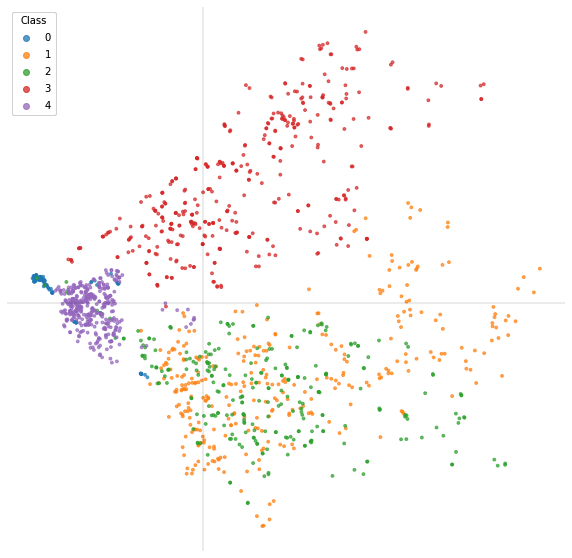

In [4]:
import sklearn.decomposition, sklearn.manifold

# example showing PCA of features
fig, ax = plt.subplots(figsize=(10, 10))

# create a PCA object
pca = sklearn.decomposition.PCA(n_components=2)

# transform every fifth vector (to save computation time)
# some techniques need this; others will be fast enough
subsample = 5
pca_X = pca.fit_transform(X[::subsample, :])

# show a scatter plot of the first two dimensions
scatter_pca = ax.scatter(
    pca_X[:, 0],
    pca_X[:, 1],
    c=y[::subsample],
    cmap="tab10",
    vmin=0,
    vmax=10,
    alpha=0.7,
    s=8,
)

##### Make the figure look a bit cleaner
# Produce a legend for the ranking (colors). Even though there are 40 different
# rankings, we only want to show 5 of them in the legend.
legend1 = ax.legend(*scatter_pca.legend_elements(num=4), loc="upper left", title="Class")
ax.add_artist(legend1)

ax.axhline(0, color="k", alpha=0.1)
ax.axvline(0, color="k", alpha=0.1)

ax.axis("off")



### 2. LLE ：
The points are all on the line. It is not good enough to recoginize different classes. Therefore, it won't be an effective method for this case study. 

(-0.010362658156478357,
 0.046430733953705755,
 -0.07093754964288433,
 0.0704360366390898)

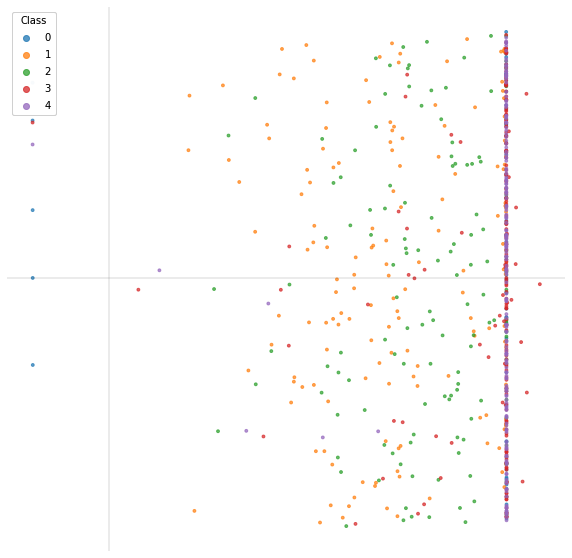

In [5]:
import sklearn.decomposition, sklearn.manifold

# example showing LLE of features
fig, ax = plt.subplots(figsize=(10, 10))

# create a LLE object
lle = sklearn.manifold.LocallyLinearEmbedding(n_components=2)

# transform every fifth vector (to save computation time)
# some techniques need this; others will be fast enough
subsample = 10
lle_X = lle.fit_transform(X[::subsample, :])

# show a scatter plot of the first two dimensions
scatter_lle = ax.scatter(
    lle_X[:, 0],
    lle_X[:, 1],
    c=y[::subsample],
    cmap="tab10",
    vmin=0,
    vmax=10,
    alpha=0.7,
    s=8,
)

##### Make the figure look a bit cleaner
# Produce a legend for the ranking (colors). Even though there are 40 different
# rankings, we only want to show 5 of them in the legend.
legend1 = ax.legend(*scatter_lle.legend_elements(num=4), loc="upper left", title="Class")
ax.add_artist(legend1)

ax.axhline(0, color="k", alpha=0.1)
ax.axvline(0, color="k", alpha=0.1)

ax.axis("off")


### 3. Isomap ：
The similar result as the PCA, so it cant give enough information to let us judge.

(-586.1972050484723, 700.2557244749022, -277.250705548252, 710.7580358783707)

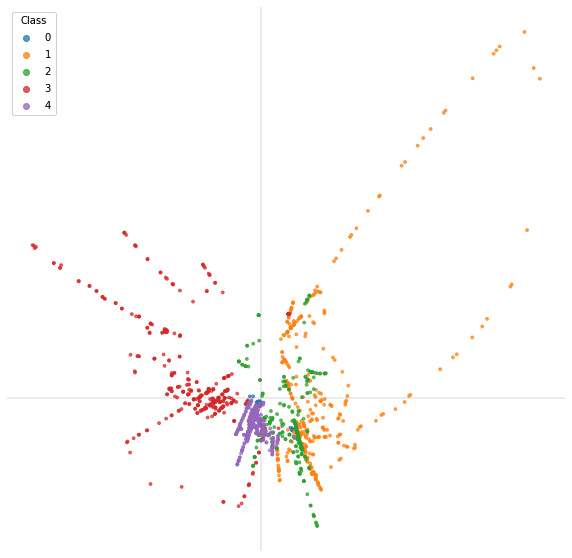

In [6]:
import sklearn.decomposition, sklearn.manifold, umap

# example showing Isomap of features
fig, ax = plt.subplots(figsize=(10, 10))

# create a Isomap object
Isomap = sklearn.manifold.Isomap(n_components=2)

# transform every fifth vector (to save computation time)
# some techniques need this; others will be fast enough
subsample = 5
Isomap_X = Isomap.fit_transform(X[::subsample, :])

# show a scatter plot of the first two dimensions
scatter_Isomap = ax.scatter(
    Isomap_X[:, 0],
    Isomap_X[:, 1],
    c=y[::subsample],
    cmap="tab10",
    vmin=0,
    vmax=10,
    alpha=0.7,
    s=8,
)

##### Make the figure look a bit cleaner
# Produce a legend for the ranking (colors). Even though there are 40 different
# rankings, we only want to show 5 of them in the legend.
legend1 = ax.legend(*scatter_Isomap.legend_elements(num=4), loc="upper left", title="Class")
ax.add_artist(legend1)

ax.axhline(0, color="k", alpha=0.1)
ax.axvline(0, color="k", alpha=0.1)

ax.axis("off")


### 4. t - SNE ：
This is the best method for this case study to judge whether the parameters are feasible to get a good ML system model, which is showed below.

(-79.18833427429199, 93.39537315368652, -53.46100196838379, 71.65500984191894)

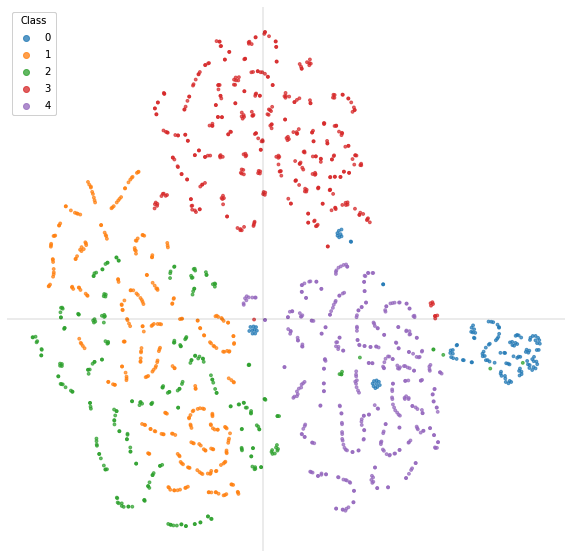

In [7]:
import sklearn.decomposition, sklearn.manifold, umap

# example showing tSNE of features
fig, ax = plt.subplots(figsize=(10, 10))

# create a tSNE object
tSNE = sklearn.manifold.TSNE(n_components=2)

# transform every fifth vector (to save computation time)
# some techniques need this; others will be fast enough
subsample = 5
tSNE_X = tSNE.fit_transform(X[::subsample, :])

# show a scatter plot of the first two dimensions
scatter_tSNE = ax.scatter(
    tSNE_X[:, 0],
    tSNE_X[:, 1],
    c=y[::subsample],
    cmap="tab10",
    vmin=0,
    vmax=10,
    alpha=0.7,
    s=8,
)

##### Make the figure look a bit cleaner
# Produce a legend for the ranking (colors). Even though there are 40 different
# rankings, we only want to show 5 of them in the legend.
legend1 = ax.legend(*scatter_tSNE.legend_elements(num=4), loc="upper left", title="Class")
ax.add_artist(legend1)

ax.axhline(0, color="k", alpha=0.1)
ax.axvline(0, color="k", alpha=0.1)

ax.axis("off")


### 5. Umap ：
It is fine to judge but it is not clear as t-SNE method.

(-5.080022501945495,
 14.436060118675233,
 -0.6976432722061873,
 13.058357238397003)

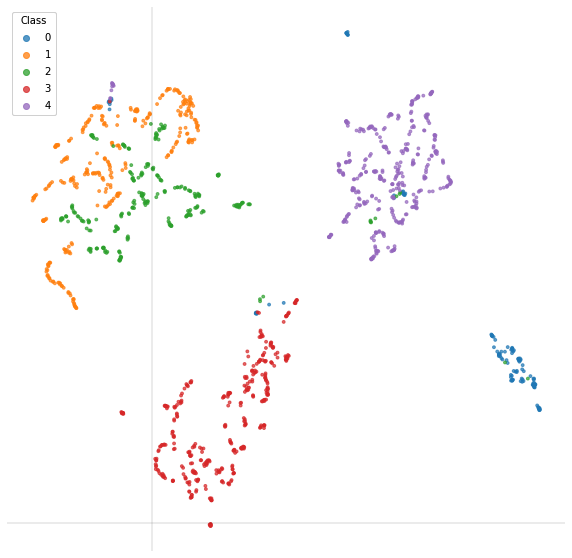

In [8]:
import sklearn.decomposition, sklearn.manifold, umap

# example showing Umap of features
fig, ax = plt.subplots(figsize=(10, 10))

# create a Umap object
umap_result = umap.UMAP(n_components=2)

# transform every fifth vector (to save computation time)
# some techniques need this; others will be fast enough
subsample = 5
umap_result_X = umap_result.fit_transform(X[::subsample, :])

# show a scatter plot of the first two dimensions
scatter_umap = ax.scatter(
    umap_result_X [:, 0],
    umap_result_X [:, 1],
    c=y[::subsample],
    cmap="tab10",
    vmin=0,
    vmax=10,
    alpha=0.7,
    s=8,
)

##### Make the figure look a bit cleaner
# Produce a legend for the ranking (colors). Even though there are 40 different
# rankings, we only want to show 5 of them in the legend.
legend1 = ax.legend(*scatter_umap.legend_elements(num=4), loc="upper left", title="Class")
ax.add_artist(legend1)

ax.axhline(0, color="k", alpha=0.1)
ax.axvline(0, color="k", alpha=0.1)

ax.axis("off")

## <center> Part 3: Result of Classifier
The code below creates a standard KNN classifier which predicts the output class based on the 7 nearest elements in feature vector space. 

In [9]:
# fit a classifier
classifier = audio_task.knn_fit(X, y)



### Visualising predictions 
In the case of perfect classification, the blocks above and below the line will be exactly the same. In practice, there will always be significant noise. The code compared the predicted area and true area, according to the picture below, we can easily know wether the parameters is feasible or not.

Testing with data/challenge_test_0
Loading into 568 windows of length 6000
Predicting...
Prediction accuracy 0.673
Confusion matrix
[[491   0   0   0   0]
 [ 99  78 101  19  31]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [ 52   0  19   0  93]]

Testing with data/challenge_test_1
Loading into 905 windows of length 6000
Predicting...
Prediction accuracy 0.188
Confusion matrix
[[ 20  33  20 250 135]
 [  0   0   0   0   0]
 [  0 105  58 128  14]
 [  0  37 267 152   0]
 [ 73   0   0 174  57]]

Testing with data/challenge_test_2
Loading into 384 windows of length 6000
Predicting...
Prediction accuracy 0.875
Confusion matrix
[[ 29   7  79]
 [  0   0   0]
 [  0   0 574]]

Testing with data/challenge_test_3
Loading into 841 windows of length 6000
Predicting...
Prediction accuracy 0.715
Confusion matrix
[[428   0   4  27  15]
 [ 81 115 246  29   2]
 [  0   0   0   0   0]
 [  0   0   0 473   0]
 [  0   0   0   0   0]]

Testing with data/challenge_test_4
Loading into 554 windows of length 6000

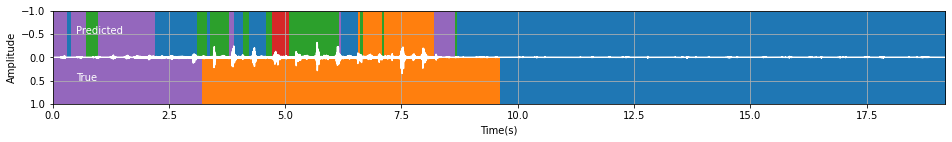

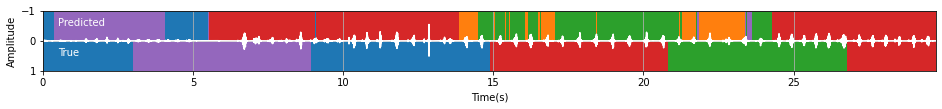

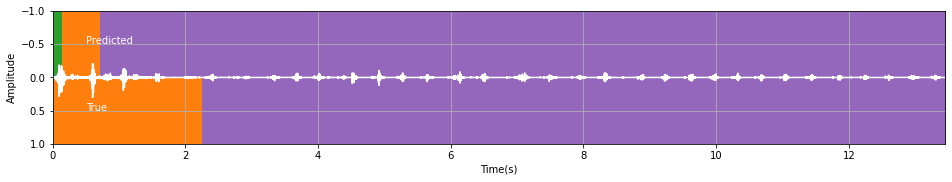

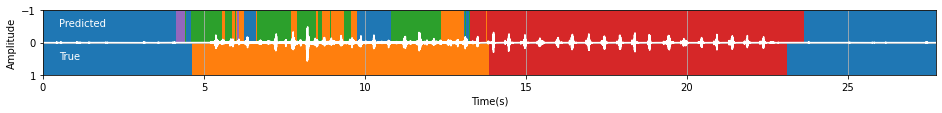

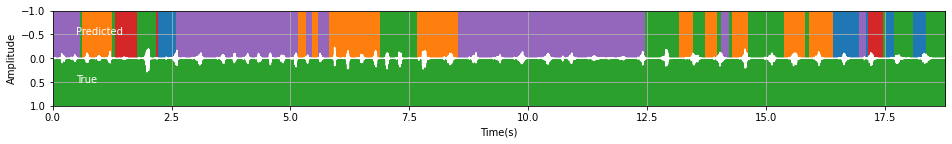

In [10]:
## Example usage -- show results for all of the test cases
for i in range(5):
    audio_task.plot_test(classifier, parameters, f"data/challenge_test_{i}")

### Final test function
There is a test function `challenge_evaluate_performance(classifier_fn)`. This gives you your total current score. You don't have access to the internals of this function. See below for how to use it.
The test takes some time to run; so you must be parsimonious with your calls to it.

In [11]:
## Shows how to evaluate your performance
audio_task.run_secret_test(classifier, parameters)

Loading into 1508 windows of length 6000
Predicting...


D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Loading into 443 windows of length 6000
Predicting...


D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Loading into 245 windows of length 6000
Predicting...


D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Loading into 1343 windows of length 6000
Predicting...


D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Loading into 17 windows of length 6000
Predicting...


D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Loading into 515 windows of length 6000
Predicting...


D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Loading into 349 windows of length 6000
Predicting...


D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Loading into 1132 windows of length 6000
Predicting...
*** Total score: 86.75 ***


D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## <center> Part 4: Conclusion
    
From the visualization, it is clear that the non-linear dimensional reduction method has a better effect than linear dimensional reduction method. We can not even judge whether the parameters are good or not from the linear one. However, we can know the information from the non-linear one, such as t-SNE and Umap.


### Finally, we can set the parameters like that, which is high score about 86.75 :

In [12]:
# parameters = {
# 'size':6000, # how long each window is, in samples
# 'step':128, # how many samples to move forward in each window
# 'decimate':2, # how much reduction of the feature vector to perform; integer = 1,2,3,4,5...
# 'feature_range' :(0, 1), # what slice of the feature vectors to take (0.0, 1.0)=whole vector
# # must be between 0.0 and 1.0 for the start and end 
# 'window_fn':"boxcar", # one of window_fns (below)
# 'feature_fn':"fft" # one of feature_fns    
# }
# gives *** Total score: 86.75 ***